In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FFMpegWriter
import matplotlib.image as mimage
import matplotlib.cbook as cbook

## Read & open file to get magnetic field intensities

In [2]:
file = open('Magnetic Data.csv', 'r')
lines = file.readlines()

In [3]:
age = []
intensity = [] #in microtesla

41
[0.040036, 0.04005, 0.0400978, 0.040192, 0.0402632, 0.040348, 0.040459, 0.040459, 0.040459, 0.040499, 0.040499, 0.04055, 0.04055, 0.040651, 0.040651, 0.04075, 0.04095, 0.040997, 0.041342, 0.041342, 0.04135, 0.041691, 0.041691, 0.042058, 0.042058, 0.042416, 0.04275, 0.042774, 0.0437377, 0.043847, 0.043847, 0.044171, 0.044171, 0.04469, 0.04475, 0.04495, 0.04495, 0.04521, 0.04545, 0.04605, 0.046548]


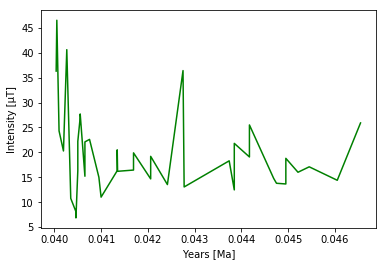

In [4]:
for line in lines[872:913]: #prints from 0.040036 Ma to 0.0473496 Ma years ago (can adjust this to do more or less)
    #895-909 laschamp event (.0416 - .04495)
    vals = line.split(',') 
    intensity.append(float(vals[3])) #units microtesla
    age.append(float(vals[2]))
print(len(age))
print(age)
plt.xlabel('Years [Ma]')
plt.ylabel('Intensity [µT]')

plt.plot(age,intensity, 'g')


## Create a loop that changes X,Y to my intensity values and generates new plots

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
38
39
40


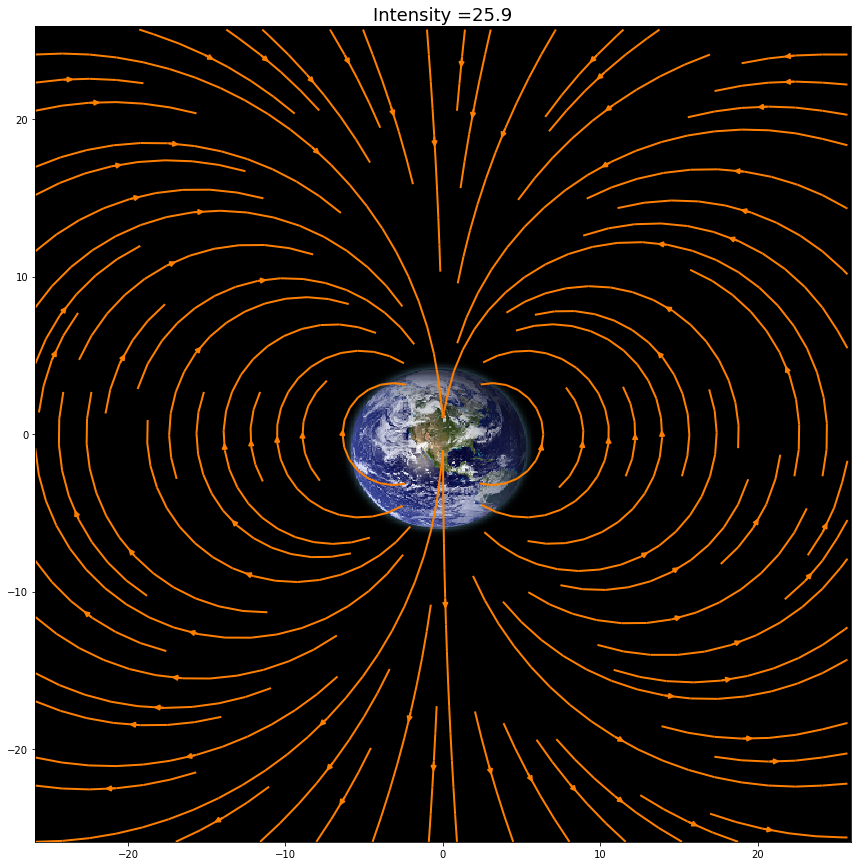

In [5]:
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1,1, 1])
ax1 = fig.add_subplot(111)
writer = FFMpegWriter (fps = 5, bitrate = 500)



with writer.saving(fig, "animation.mp4", len(intensity)*2):
    for i in range(len(intensity)):
        Y,X = np.meshgrid(np.arange(-intensity[i], intensity[i], .2), np.arange(-intensity[i], intensity[i], .2))

        U = (X+1)/((X+1)**2 + Y**2) - (X-1)/((X-1)**2 + Y**2)

        V = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)
        if i >= 23 and i <= 37:  
            plt.cla()   
            ax1.set_title('Intensity =' + str(intensity[i]), fontsize = 18)
            img = plt.imread("Earth.png")
            ax1.imshow(img, extent = (-intensity[i],intensity[i], -intensity[i], intensity[i]))
            ax1.streamplot(Y,X,V,U, color = V, linewidth = 2, cmap = 'terrain')
            writer.grab_frame()
        else: 
            plt.cla()   
            ax1.set_title('Intensity =' + str(intensity[i]), fontsize = 18)
            img = plt.imread("Earth.png")
            ax1.imshow(img, extent = (-intensity[i],intensity[i], -intensity[i], intensity[i]))
            ax1.streamplot(Y,X,V,U, color = V, linewidth = 2, cmap = 'autumn')
            writer.grab_frame()
            print(i)
